Tis file has been used to generate the dataset as described in the paper. Also the code to generate plots, etc. is provided here.s

In [129]:
import pandas
import utils.files.path as path_utils
import utils.loops as loop_utils
import matplotlib.pyplot as plt
import os


In [130]:
start_week = '2019-01-01'
end_week = '2023-01-01'

In [131]:
study_naics_codes_table = [
    '11','21','22','23','31','42','44','48','51','52','53','54','55','56','61','62','71','72','81','92','1114','1151','2111','2131','2211','2212','2361','2371','2373','2381','2382','2389','3118','3119','3121','3149','3159','3162','3169','3219','3222','3231','3241','3255','3261','3271','3272','3312','3313','3323','3325','3328','3329','3331','3334','3344','3345','3352','3361','3364','3369','3391','3399','4231','4232','4233','4234','4235','4236','4237','4238','4242','4243','4244','4245','4246','4247','4249','4411','4412','4421','4431','4441','4442','4451','4453','4461','4471','4482','4483','4511','4522','4523','4531','4532','4533','4543','4811','4821','4831','4832','4841','4851','4852','4853','4854','4859','4871','4881','4883','4884','4885','4889','4911','4921','4931','5111','5121','5122','5151','5152','5179','5182','5191','5221','5222','5223','5231','5241','5242','5259','5311','5312','5321','5322','5323','5324','5411','5412','5413','5416','5417','5418','5511','5613','5614','5616','5619','5621','5622','5629','6111','6112','6113','6114','6115','6116','6117','6211','6212','6214','6215','6216','6219','6221','6222','6223','6231','6233','6241','6242','6244','7111','7112','7113','7121','7131','7132','7211','7212','7223','7224','8111','8114','8122','8123','8131','8132','8133','8134','8139','9211','9221','9231','9261','9281'
]

study_naics_codes_corr = [
    11, 21, 22, 23, 31, 42, 44, 48, 51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92, 1114, 1151, 2111, 2131, 2211, 2212, 2361, 2371, 2373, 2381, 2382, 2389, 3118, 3119, 3121, 3149, 3159, 3162, 3169, 3219, 3222, 3231, 3241, 3255, 3261, 3271, 3272, 3312, 3313, 3323, 3325, 3328, 3329, 3331, 3334, 3344, 3345, 3352, 3361, 3364, 3369, 3391, 3399, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4242, 4243, 4244, 4245, 4246, 4247, 4249, 4411, 4412, 4421, 4431, 4441, 4442, 4451, 4453, 4461, 4471, 4482, 4483, 4511, 4522, 4523, 4531, 4532, 4533, 4543, 4811, 4821, 4831, 4832, 4841, 4851, 4852, 4853, 4854, 4859, 4871, 4881, 4883, 4884, 4885, 4889, 4911, 4921, 4931, 5111, 5121, 5122, 5151, 5152, 5179, 5182, 5191, 5221, 5222, 5223, 5231, 5241, 5242, 5259, 5311, 5312, 5321, 5322, 5323, 5324, 5411, 5412, 5413, 5416, 5417, 5418, 5511, 5613, 5614, 5616, 5619, 5621, 5622, 5629, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6211, 6212, 6214, 6215, 6216, 6219, 6221, 6222, 6223, 6231, 6233, 6241, 6242, 6244, 7111, 7112, 7113, 7121, 7131, 7132, 7211, 7212, 7223, 7224, 8111, 8114, 8122, 8123, 8131, 8132, 8133, 8134, 8139, 9211, 9221, 9231, 9261, 9281
]

study_naics_codes = [
    11, 21, 22, 23, 31, 42, 44, 48, 51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92, 1114, 1151, 2111, 2131, 2211, 2212, 2361, 2371, 2373, 2381, 2382, 2389, 3118, 3119, 3121, 3149, 3159, 3162, 3169, 3219, 3222, 3231, 3241, 3255, 3261, 3271, 3272, 3312, 3313, 3323, 3325, 3328, 3329, 3331, 3334, 3344, 3345, 3352, 3361, 3364, 3369, 3391, 3399, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4242, 4243, 4244, 4245, 4246, 4247, 4249, 4411, 4412, 4421, 4431, 4441, 4442, 4451, 4453, 4461, 4471, 4482, 4483, 4511, 4522, 4523, 4531, 4532, 4533, 4543, 4811, 4821, 4831, 4832, 4841, 4851, 4852, 4853, 4854, 4859, 4871, 4881, 4883, 4884, 4885, 4889, 4911, 4921, 4931, 5111, 5121, 5122, 5151, 5152, 5179, 5182, 5191, 5221, 5222, 5223, 5231, 5241, 5242, 5259, 5311, 5312, 5321, 5322, 5323, 5324, 5411, 5412, 5413, 5416, 5417, 5418, 5511, 5613, 5614, 5616, 5619, 5621, 5622, 5629, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6211, 6212, 6214, 6215, 6216, 6219, 6221, 6222, 6223, 6231, 6233, 6241, 6242, 6244, 7111, 7112, 7113, 7121, 7131, 7132, 7211, 7212, 7223, 7224, 8111, 8114, 8122, 8123, 8131, 8132, 8133, 8134, 8139, 9211, 9221, 9231, 9261, 9281
]



study_naics_codes_lines = [31,44,48,52,53,61,62,71,72,81]
# study_naics_codes =[11, 21, 22, 23, 31, 42, 44, 48, 51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92]


In [ ]:
paper_dir = "/home"

In [132]:
def print_dict(d):
    for k, v in d.items():
        print(k, v)

def get_metrics_column(data):
    metrics = []
    for metric in data:
        metric = metric.replace('_column', '') 
        metrics.append(metric)

    return metrics

In [ ]:
naics_data_path = 'data/p2/weekly'
all_file_names = path_utils.get_all_files(naics_data_path, path=False)

def get_names(file_names, start_string=None, end_string=None, sort_result=True):
    results = []
    for file_name in file_names:
        if start_string and not file_name.startswith(start_string):
            continue
        if end_string and not file_name.endswith(end_string):
            continue
        results.append(file_name)
    if sort_result:
        results.sort()
        
    return results

statistics_file_names = get_names(all_file_names, end_string='statistics.csv')
distance_file_names = get_names(statistics_file_names, start_string='distance')
dwell_file_names = get_names(statistics_file_names, start_string='dwell')
visitors_file_names = get_names(statistics_file_names, start_string='visitors')

In [ ]:
for input_files in [ distance_file_names, dwell_file_names, visitors_file_names]:
    print(input_files)
    weeks = set()
    data = {}
    for file_name in input_files:
        relative_path = path_utils.join_path(naics_data_path, file_name)
        data_type, week = file_name.split('_')[0:2]
        if week < start_week or week > end_week:
            continue
        weeks.add(week)
        file_path = path_utils.get_absolute_path(relative_path)
        df = pandas.read_csv(file_path)
        study_df = df.copy()
        study_df = study_df[study_df['naics_code'].isin(study_naics_codes)]
        
        for row in study_df.itertuples():
            naics_code = row.naics_code
            if naics_code not in data:
                data[naics_code] = {}
                data[naics_code]['metrics'] = get_metrics_column(row._fields[2:11])
            data[naics_code][week] = row[2:11]

    for naics_code, week_data in data.items():
        naics_code_df = pandas.DataFrame(week_data)
        output_dir = path_utils.join_path(naics_data_path, 'paper', data_type)
        output_dir_abs = path_utils.get_absolute_path(output_dir)
        os.makedirs(output_dir_abs, exist_ok=True)
        naics_code_df.to_csv(path_utils.join_path(output_dir_abs, f'{naics_code}.csv'), index=False)
        
    

['distance_2018-01-01_statistics.csv', 'distance_2018-01-08_statistics.csv', 'distance_2018-01-15_statistics.csv', 'distance_2018-01-22_statistics.csv', 'distance_2018-01-29_statistics.csv', 'distance_2018-02-05_statistics.csv', 'distance_2018-02-12_statistics.csv', 'distance_2018-02-19_statistics.csv', 'distance_2018-02-26_statistics.csv', 'distance_2018-03-05_statistics.csv', 'distance_2018-03-12_statistics.csv', 'distance_2018-03-19_statistics.csv', 'distance_2018-03-26_statistics.csv', 'distance_2018-04-02_statistics.csv', 'distance_2018-04-09_statistics.csv', 'distance_2018-04-16_statistics.csv', 'distance_2018-04-23_statistics.csv', 'distance_2018-04-30_statistics.csv', 'distance_2018-05-07_statistics.csv', 'distance_2018-05-14_statistics.csv', 'distance_2018-05-21_statistics.csv', 'distance_2018-05-28_statistics.csv', 'distance_2018-06-04_statistics.csv', 'distance_2018-06-11_statistics.csv', 'distance_2018-06-18_statistics.csv', 'distance_2018-06-25_statistics.csv', 'distance_2

In [ ]:
def get_label_text(naic_code, ignore=False):
    if ignore:
        return f"{naic_code}"
    label_text = ""
    if naic_code == 31:
        label_text = "31-33"
    elif naic_code == 44:
        label_text = "44-45"
    elif naic_code == 48:
        label_text = "48-49"
    else:
        label_text = f"{naic_code}"
    return label_text

def line_plot(input_df,config=None, column_name='naics_code', save_dir=f'{paper_dir}/figs'):
    data_df = input_df[input_df[column_name]<100]
    df_long = data_df.melt(id_vars=column_name, var_name='date', value_name='value')
    df_long['date'] = pandas.to_datetime(df_long['date'])
    #filter date:
    # df_long = df_long[df_long['date'] < '2022-01-01']
    df_long = df_long[df_long['date']>= start_week]
    df_long = df_long[df_long['date']<= end_week]

    
    plt.figure(figsize=(20, 10))
    for naics in data_df[column_name]:
        subset = df_long[df_long[column_name] == naics]
        label_text = get_label_text(naic_code=naics)
        plt.plot(subset['date'], subset['value'], label=f"{label_text}")

    plt.xlabel(config['x_label'] if config and 'x_label' in config else 'Date')
    plt.ylabel(f"The {config['y_label']} of {config['title']}" if config and 'y_label' in config else 'Value')
    title = config['title'] if config and 'title' in config else 'NAICS Data'
    label = config['y_label'] if config and 'y_label' in config else 'Value'
    if label == 'q2':
        label = 'median'
    # plt.title(f"{title} - {label}")
    # add 1 margin to the left and 0 margin to the right

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #scintific notation for number more than 1000
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'{save_dir}/line-{title}-{label}.png')
    plt.show()

def corelate_matrix(input_df, config=None, column_name='naics_code', save_dir=f'{paper_dir}/figs'):
    data_df = input_df[input_df[column_name]<9999]
    df_long = data_df.melt(id_vars=column_name, var_name='date', value_name='value')
    df_long['date'] = pandas.to_datetime(df_long['date'])
    df_long = df_long.pivot(index='date', columns=column_name, values='value')
    #'date' < '2022-01-01']
    #filter date:
    df_long = df_long[df_long.index >= start_week]
    df_long = df_long[df_long.index <= end_week]

    corr = df_long.corr()
    corr.columns = [get_label_text(naic_code=naics) for naics in corr.columns]
    corr.index = [get_label_text(naic_code=naics) for naics in corr.index]
    plt.figure(figsize=(15, 10))
    plt.matshow(corr, cmap='coolwarm', fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar()
    title = config['title'] if config and 'title' in config else 'NAICS Data'
    label = config['y_label'] if config and 'y_label' in config else 'Correlation Matrix'
    if label == 'q2':
        label = 'median'
    # plt.title(f"{title} - {label}")
    # plt.savefig(f'{save_dir}/correlation-{title}-{label}.png')
    # save as table:
    corr.to_csv(f'{save_dir}/correlation-{title}-{label}.csv')
    # plt.show()
    plt.close()
    return df_long, corr



In [136]:
corr_table = pandas.DataFrame(columns=['naics_code', 'mean_visitors','distance', 'visitors', 'dwell'])
corr_table['naics_code'] = study_naics_codes_table
# sort by naics_code
corr_table = corr_table.sort_values(by='naics_code')

In [137]:
def get_parent(naics_code):
    parent = naics_code[:2]
    if parent == '31' or parent == '32' or parent == '33':
        return '31'
    if parent == '44' or parent == '45':
        return '44'
    if parent == '48' or parent == '49':
        return '48'
    return parent


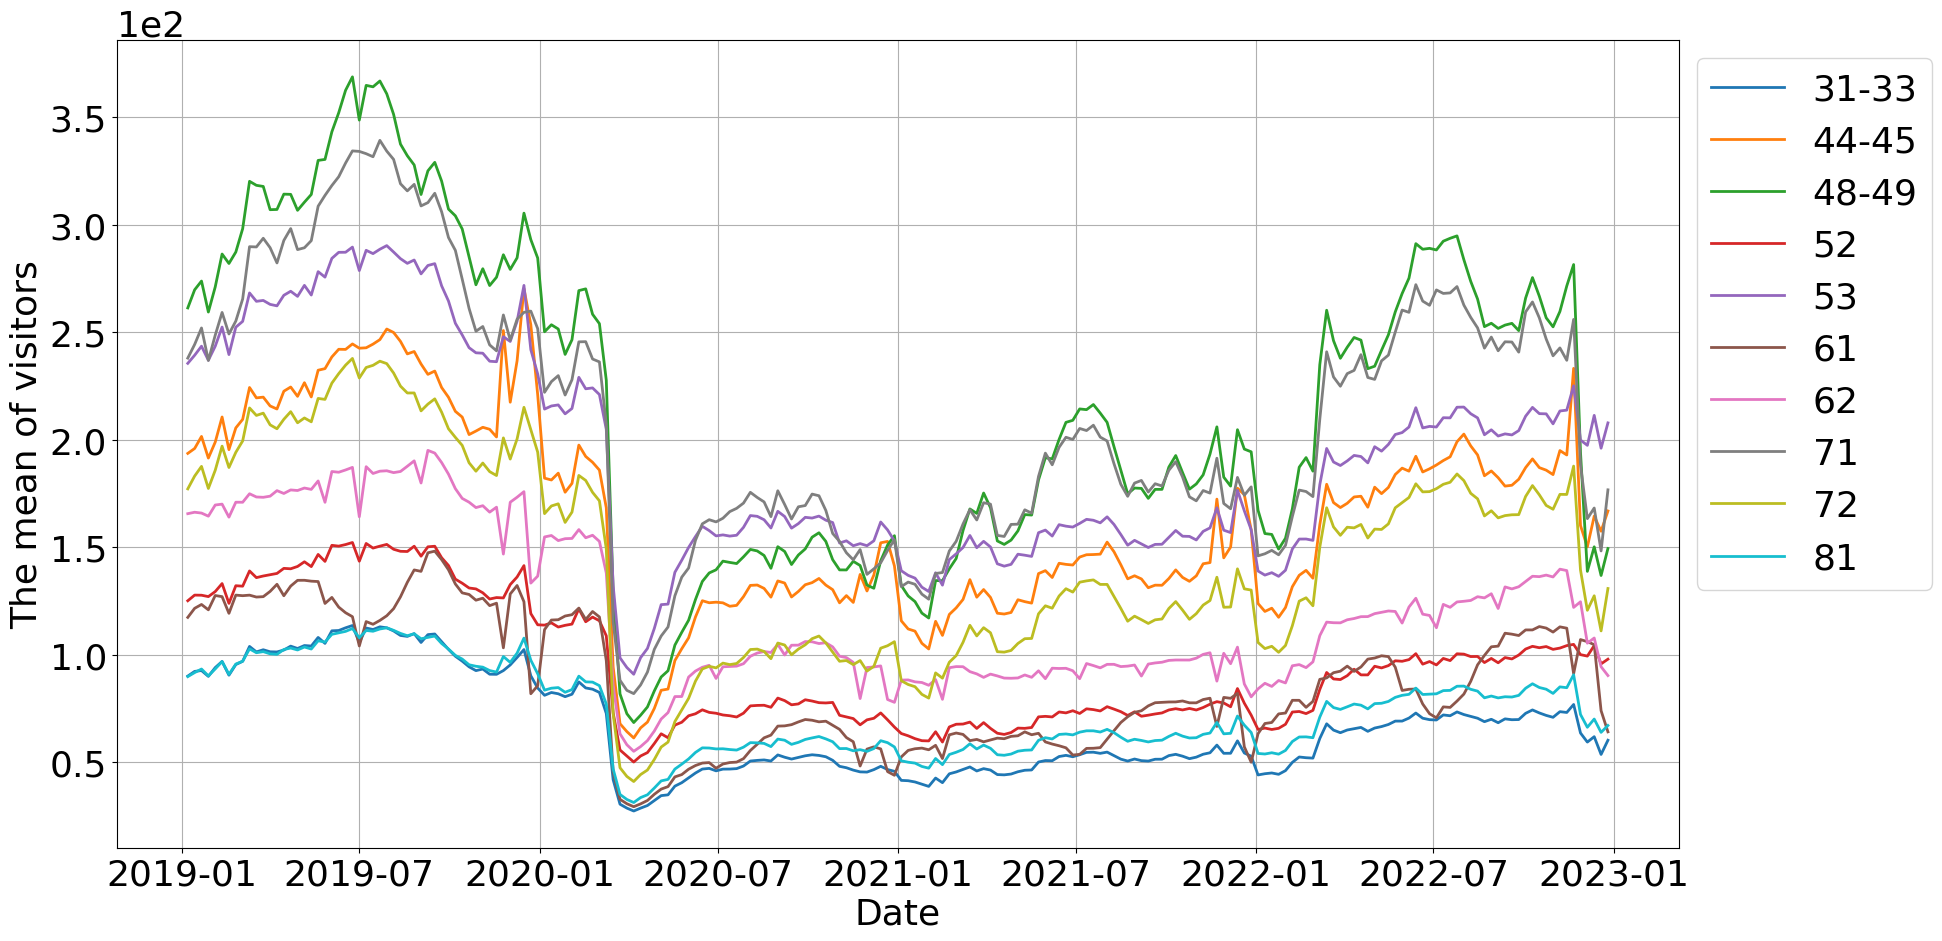

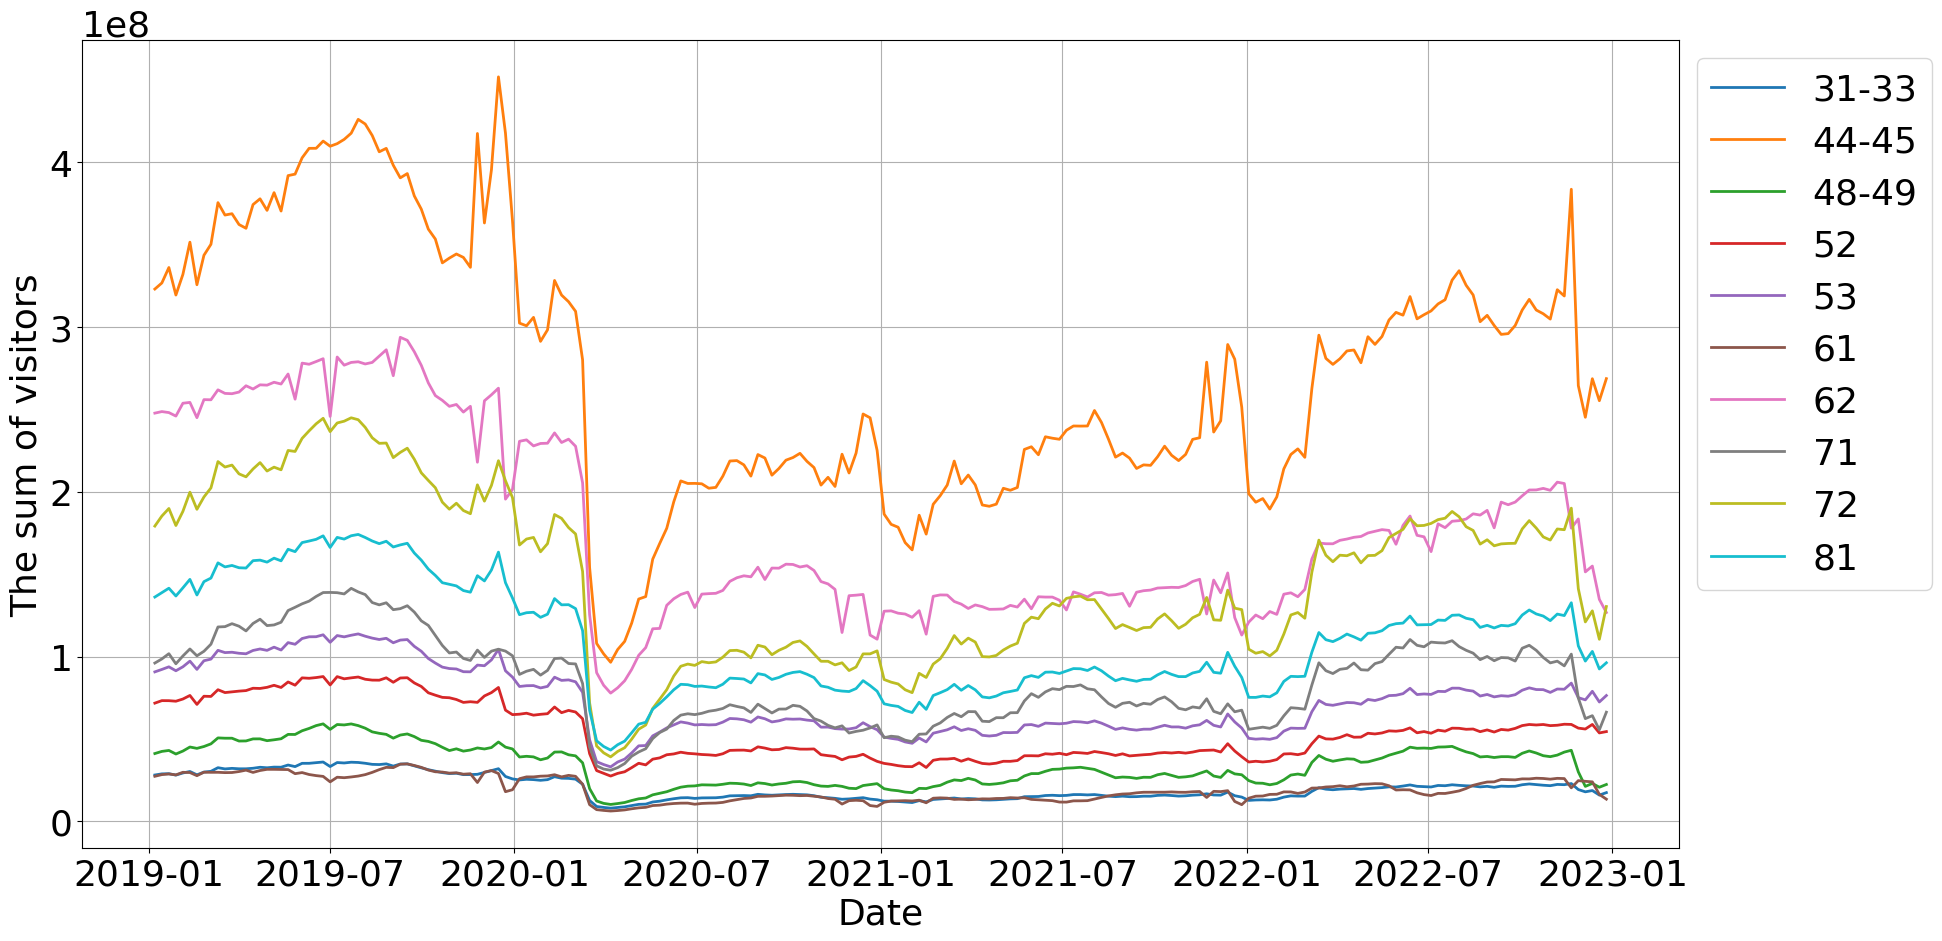

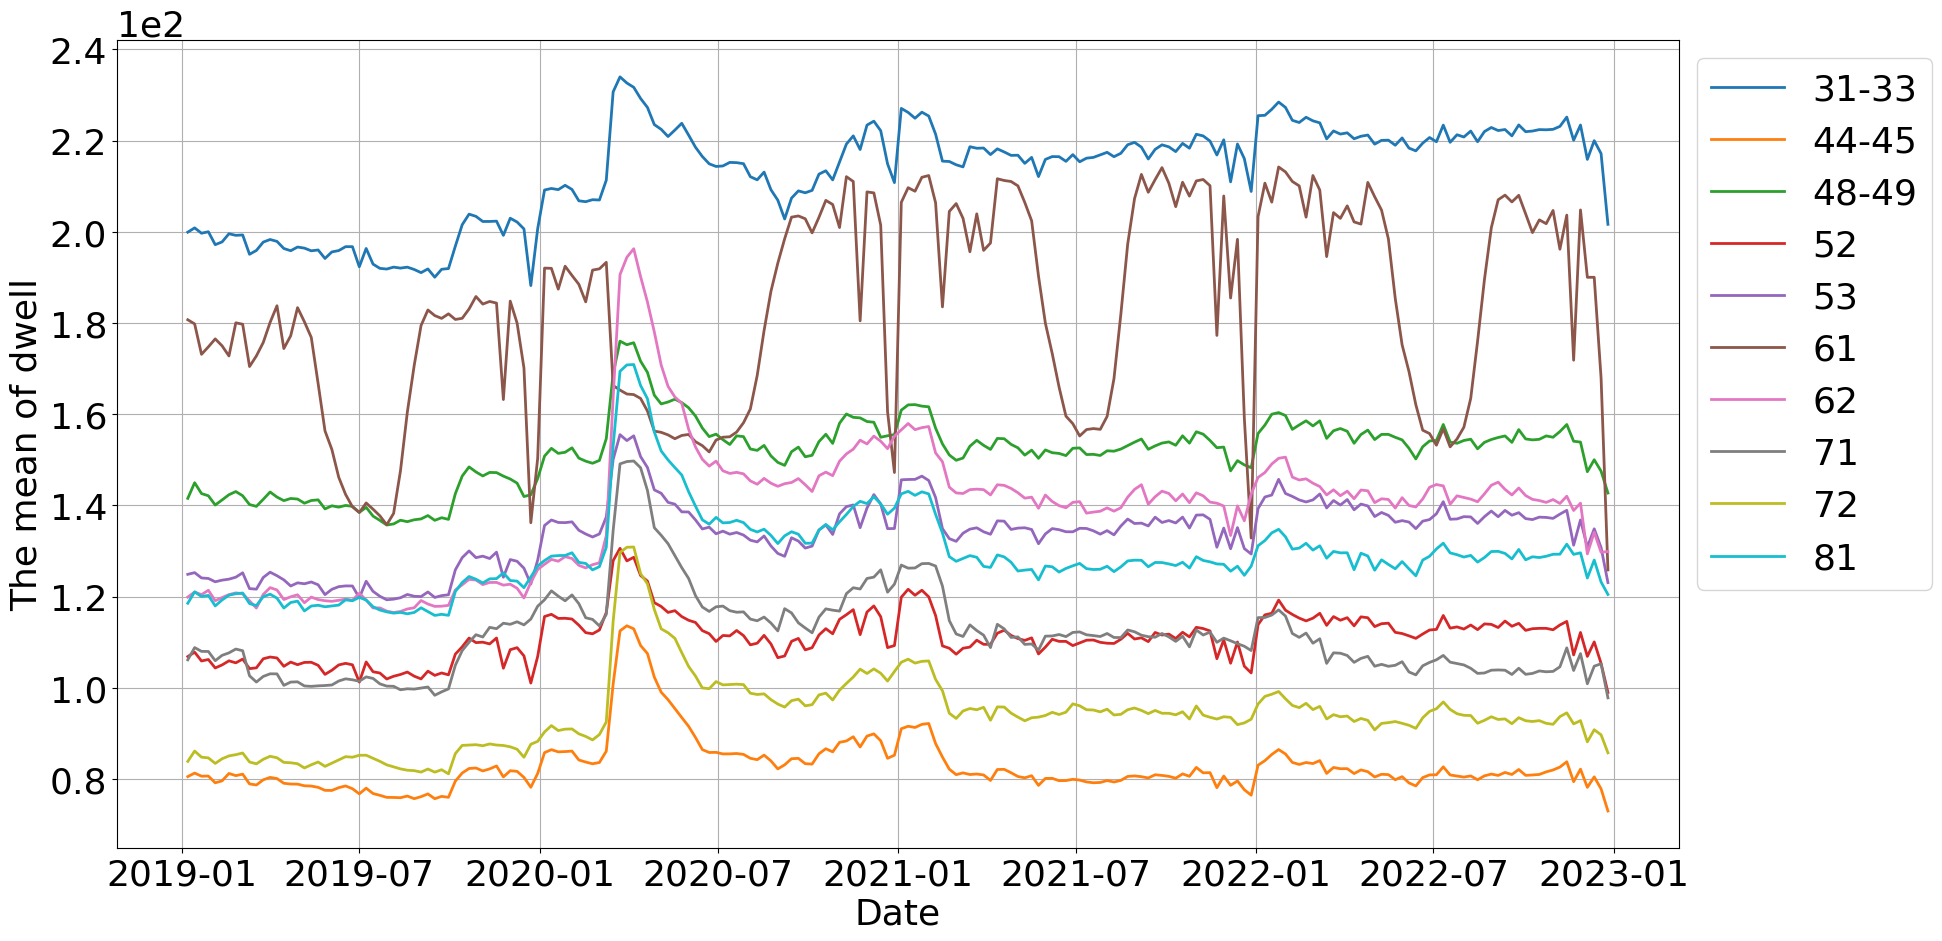

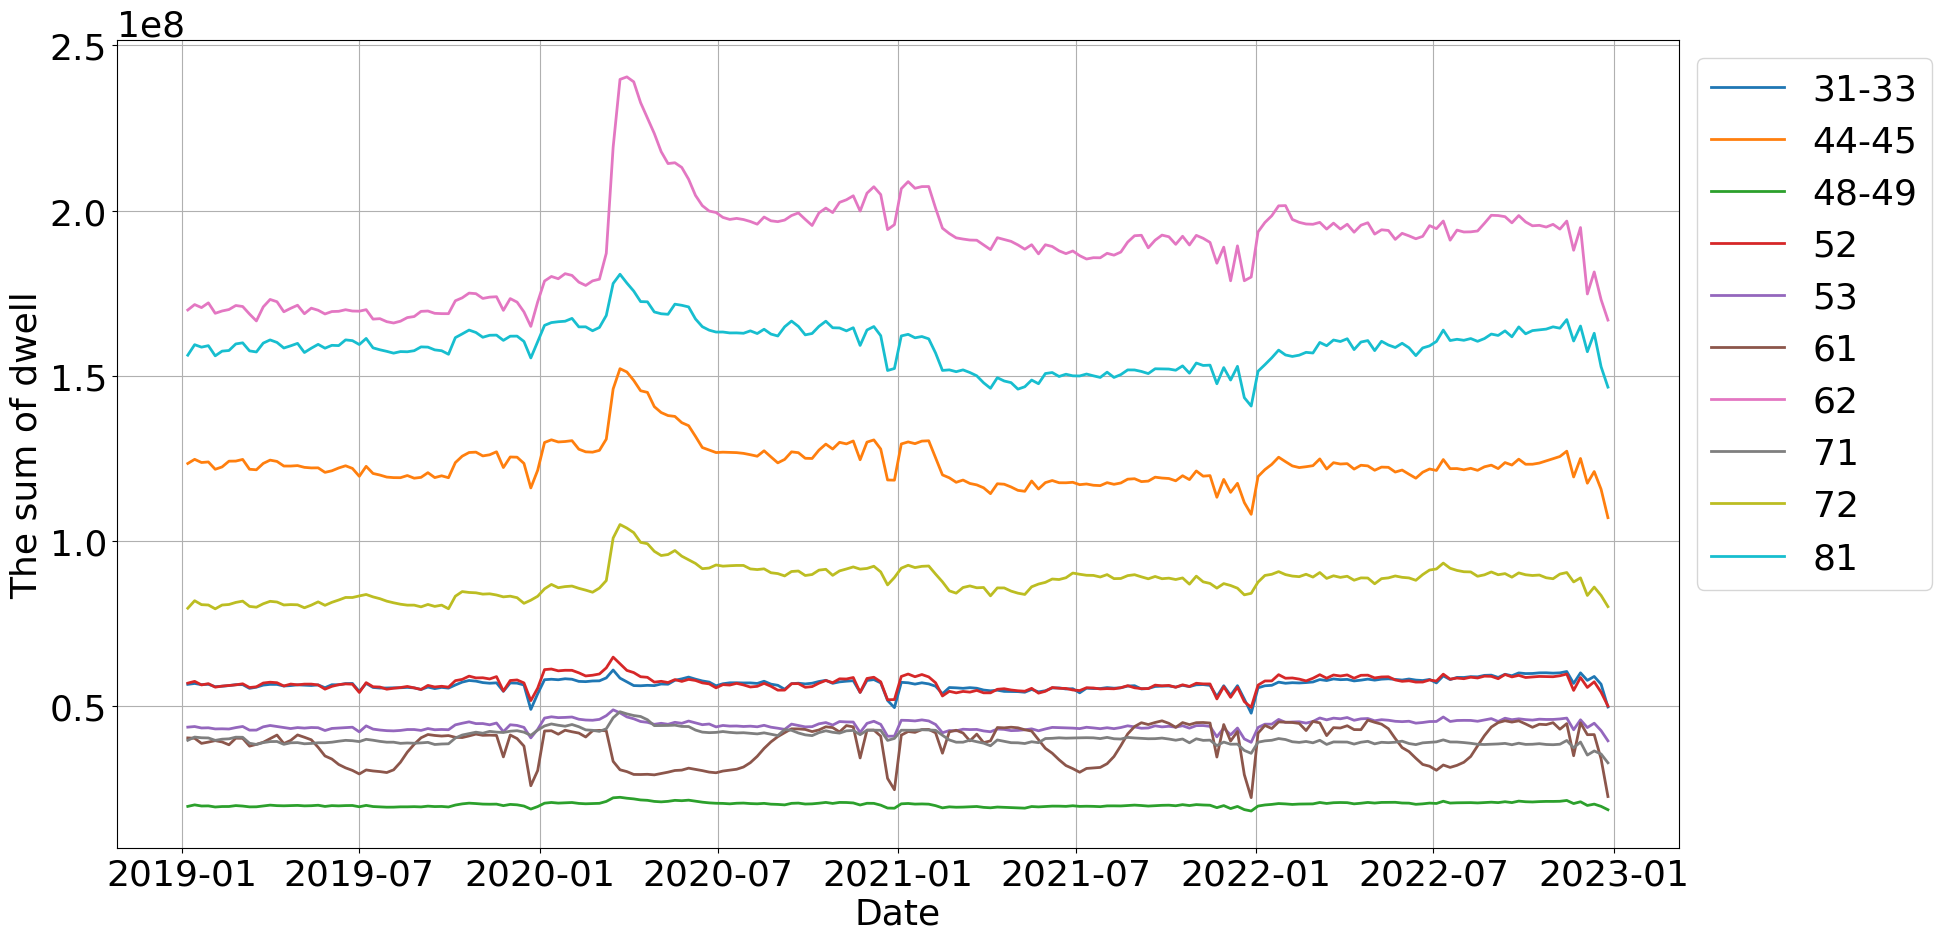

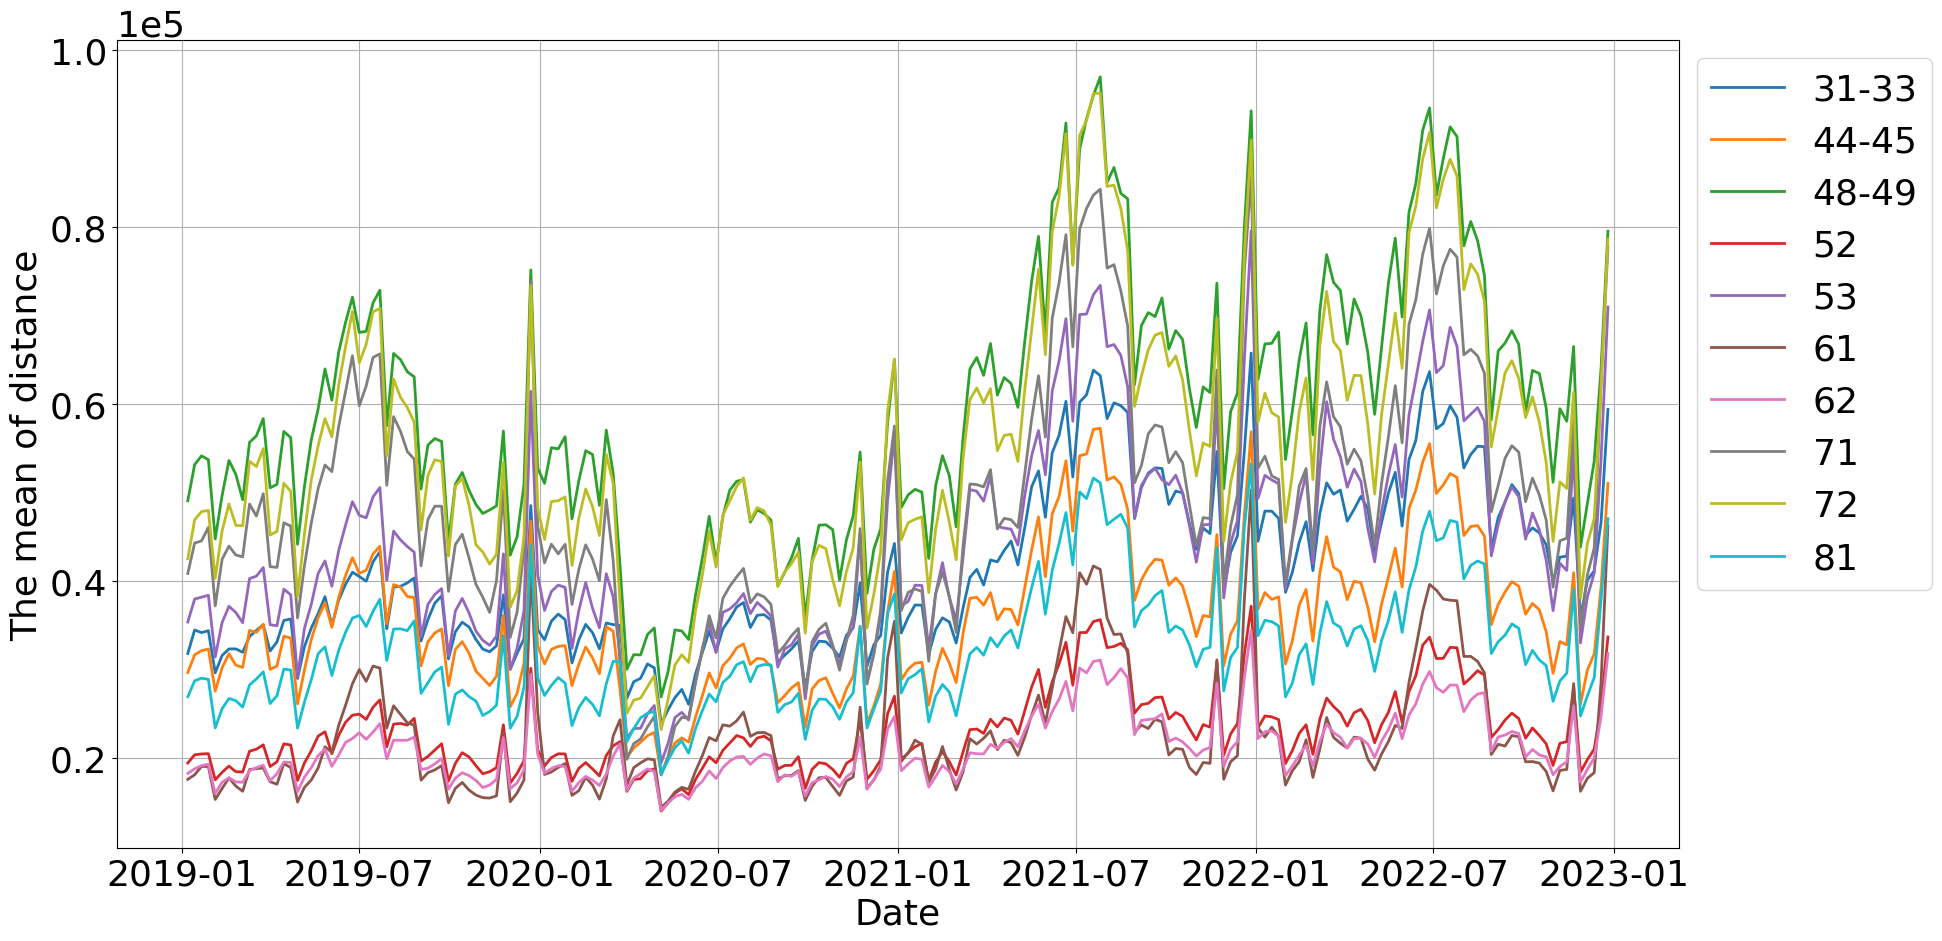

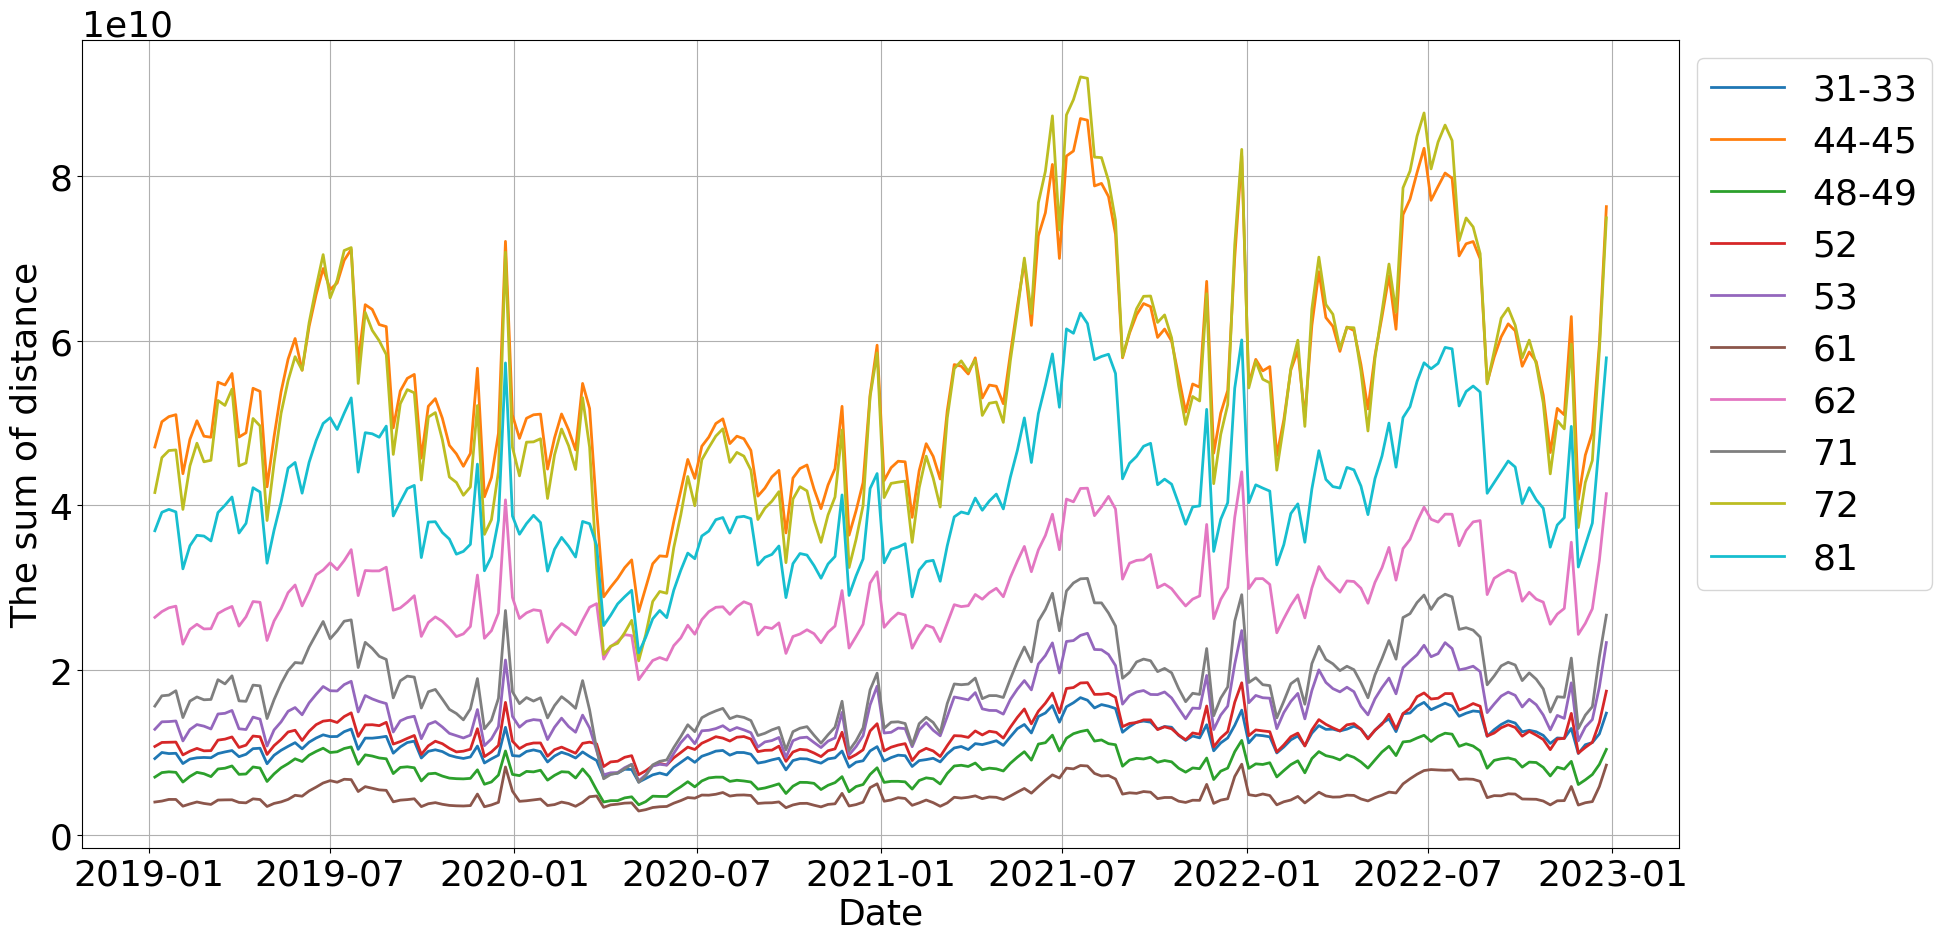

In [ ]:
metric_names=['mean',  'sum']#'q2','count','sum']
value_names = ['visitors','dwell', 'distance']
for value_name, metric_name in loop_utils.product(value_names, metric_names):
    file_name = f'{value_name}_{metric_name}.csv'
    data_path = path_utils.join_path(naics_data_path, file_name, absolute=True)
    input_df = pandas.read_csv(data_path)
    input_df_lines = input_df[input_df['naics_code'].isin(study_naics_codes_lines)]
    input_df_corr = input_df[input_df['naics_code'].isin(study_naics_codes_corr)]
    if metric_name == 'q2':
        metric_name = 'median'
    config = {
        'title': f'{value_name}',
        'x_label': 'Date',
        'y_label': f'{metric_name}'
    }
    plt.rcParams.update({'font.size': 26})
    plt.rcParams.update({'lines.linewidth': 2})

    line_plot(input_df_lines, config)
    data_df, corr_df = corelate_matrix(input_df_corr, config)
    if metric_name == 'mean':
        if value_name == 'visitors':
            mean_df = data_df.mean()
        print(f"Correlation matrix for {value_name} - {metric_name}")
        for row in corr_df.itertuples():
            parent = get_parent(row.Index)
            corr_table.loc[corr_table['naics_code'] == row.Index, 'mean_visitors'] = mean_df.loc[int(row.Index)]
            corr_table.loc[corr_table['naics_code'] == row.Index, value_name] = corr_df.loc[parent, row.Index]


In [ ]:
corr_table.to_csv(f'{paper_dir}/figs/correlation_table.csv', index=False)
latex_table = corr_table.copy()
latex_table.dropna(inplace=True)
latex_table['naics_code'] = latex_table['naics_code'].astype(str)
text_tex = ""
for i in range(0, 1):
    # table = latex_table[latex_table['naics_code'].str.startswith(f'{i}')]
    table = latex_table.copy()
    if not table.empty and i >=0:
        table.columns = [col.replace('_', '-') for col in latex_table.columns]
        # table.to_latex(f'{paper_dir}/correlation_table{i}.tex', index=False)
        # keep the round values in latex
    
        # table.to_latex(f'{paper_dir}/correlation_table{i}.tex', index=False, float_format="%.3f", column_format='lcccc')
        # use tabularx to make the table fit the page
        

    
        text_tex += f"""
    \\begin{{table}}
        \\centering
        \\small
        \\caption{{Correlation matrix for naics code starting with {i}}}
        \\input{{correlation_table{i}.tex}}
    \\end{{table}}
    """
    with open(f'{paper_dir}/correlation_table.tex', 'w') as f:
        f.write(text_tex)


In [ ]:
def get_index(list, value):
    for i, v in enumerate(list):
        # print(i, v, value)
        if v == value:
            return i
        
    return -2

def get_naics_caption(code):
    if code ==11:
        return "11 (Agriculture, Forestry, Fishing, and Hunting)"
    if code == 44:
        return "44-45 (retail trade)"

def get_folder_caption(folder):
    if folder == 'distance':
        return "distance traveled"
    if folder == 'dwell':
        return "dwell time (in minutes)"
    if folder == 'visitors':
        return "number of visitors"
    
study_naics_codes =[11, 21, 22, 23, 31, 42, 44, 48, 51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92]
overall_info_df = pandas.DataFrame(columns=['naics_code', 'avg_count', 'avg_mean', 'min', 'max'])
naics_code_dict = {}
table_data_example = {}
table_data_example[11] = {}
table_data_example[44] = {}
for folder in ['distance', 'dwell', 'visitors']:
    for naics_code in study_naics_codes:
        data = pandas.read_csv(f"{paper_dir}/{folder}/{naics_code}.csv")
        #drop row with name sum
        data = data[data['metrics'] != 'sum']
        columns = data.columns
        start_index = get_index(columns, '2019-01-07')
        end_index = get_index(columns, '2023-01-02')
        new_columns = pandas.Index([columns[0]]).append(columns[start_index:end_index+1])
        table_data_example_columns = pandas.Index([columns[0]]).append(columns[start_index:start_index+4]).append(columns[end_index-2:end_index+1])
        data = data[new_columns]
        table_data_example_df = data[table_data_example_columns]
        if new_columns[1] != '2019-01-07' or new_columns[-1] != '2023-01-02':
            print("Error")
            print(columns)
        if folder == 'distance':
            naics_code_dict[naics_code] = {}
            naics_code_dict[naics_code]['count'] = data[data['metrics']=='count'].iloc[:,1:].astype(float).mean().mean()
            naics_code_dict[naics_code]['min'] = data[data['metrics']=='count'].iloc[:,1:].astype(float).min().min()
            naics_code_dict[naics_code]['max'] = data[data['metrics']=='count'].iloc[:,1:].astype(float).max().max()
        if naics_code == 11 or naics_code == 44:
            table_data_example_df.insert(5, "...", "...")
            table_data_example[naics_code][folder] = table_data_example_df.to_latex(index=False, float_format="%.2f")


    naics_code_dict_df = pandas.DataFrame.from_dict(naics_code_dict, orient='index')
    print(naics_code_dict_df.T.to_latex(float_format="%.2f"))

for naics_code in [11, 44]:
    for folder in ['distance', 'dwell', 'visitors']:
        print("\\begin{table}[t]")
        print("\\centering")
        print("\\small")
        print(f"\\caption{{Data examples for NAICS Code {get_naics_caption(naics_code)} and {get_folder_caption(folder)} for the available data (2019-2023)}}")
        print(f"\\label{{tab:example_{folder}_{naics_code}}}")
        print(table_data_example[naics_code][folder])
        print("\\end{table}")






Error
Index(['metrics', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
       '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25', '2019-03-04',
       ...
       '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
       '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19', '2022-12-26'],
      dtype='object', length=209)
Error
Index(['metrics', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
       '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25', '2019-03-04',
       ...
       '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
       '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19', '2022-12-26'],
      dtype='object', length=209)
Error
Index(['metrics', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
       '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25', '2019-03-04',
       ...
       '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
       '2022-11-28', '2022-12-05', '2022-